In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
data_path = "Global YouTube Statistics.csv"
df = pd.read_csv(data_path, encoding='latin-1')

# Display the first few rows
df.head()

# --- Preprocessing ---
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(0, inplace=True)

# Convert necessary columns to numeric
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')
df['video views'] = pd.to_numeric(df['video views'], errors='coerce')
df['uploads'] = pd.to_numeric(df['uploads'], errors='coerce')
df['lowest_monthly_earnings'] = pd.to_numeric(df['lowest_monthly_earnings'], errors='coerce')
df['highest_monthly_earnings'] = pd.to_numeric(df['highest_monthly_earnings'], errors='coerce')
df['lowest_yearly_earnings'] = pd.to_numeric(df['lowest_yearly_earnings'], errors='coerce')
df['highest_yearly_earnings'] = pd.to_numeric(df['highest_yearly_earnings'], errors='coerce')
df['subscribers_for_last_30_days'] = pd.to_numeric(df['subscribers_for_last_30_days'], errors='coerce')

# Convert dates to datetime format if applicable
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# --- Analysis ---



Top 10 YouTube Channels:
                     Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


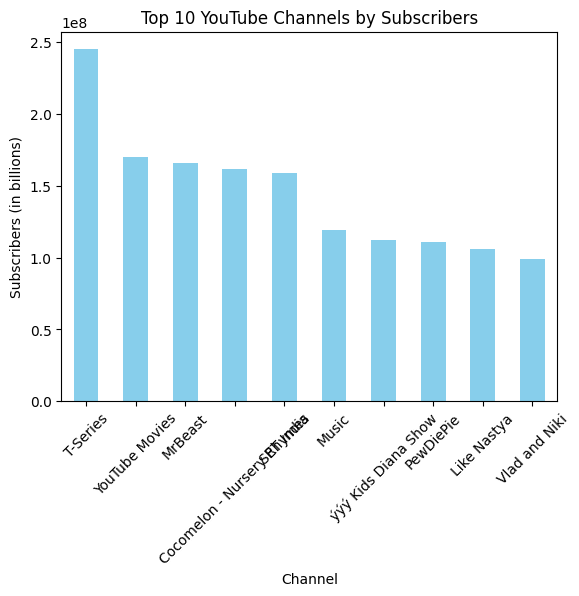

In [25]:
# 1. Top 10 YouTube channels based on the number of subscribers
top_10_channels = df.nlargest(10, 'subscribers')[['Youtuber', 'subscribers']]
print("Top 10 YouTube Channels:")
print(top_10_channels)

# Plot
top_10_channels.plot(kind='bar', x='Youtuber', y='subscribers', legend=False, color='skyblue')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.xlabel('Channel')
plt.ylabel('Subscribers (in billions)')
plt.xticks(rotation=45)
plt.show()

In [26]:
# 2. Category with the highest average number of subscribers
category_avg_subscribers = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print("Category with the highest average number of subscribers:")
print(category_avg_subscribers.head(1))

Category with the highest average number of subscribers:
category
Shows    4.161538e+07
Name: subscribers, dtype: float64


In [27]:
# 3. Average number of videos uploaded by category
category_avg_uploads = df.groupby('category')['uploads'].mean().sort_values(ascending=False)
print("Average number of uploads by category:")
print(category_avg_uploads)

Average number of uploads by category:
category
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
Shows                     27443.692308
Sports                    14493.727273
Entertainment             12052.445378
People & Blogs             9256.793893
Trailers                   6839.000000
Pets & Animals             4451.500000
Gaming                     4313.414894
Movies                     3553.000000
Education                  3142.866667
Film & Animation           2861.844444
Music                      2347.129353
Science & Technology       2114.058824
Autos & Vehicles           1898.500000
Howto & Style              1700.794872
Comedy                     1119.753623
0                           817.339623
Travel & Events             766.000000
Name: uploads, dtype: float64


Top 5 Countries with the Most YouTube Channels:
Country
United States     313
India             167
0                 122
Brazil             62
United Kingdom     43
Name: count, dtype: int64


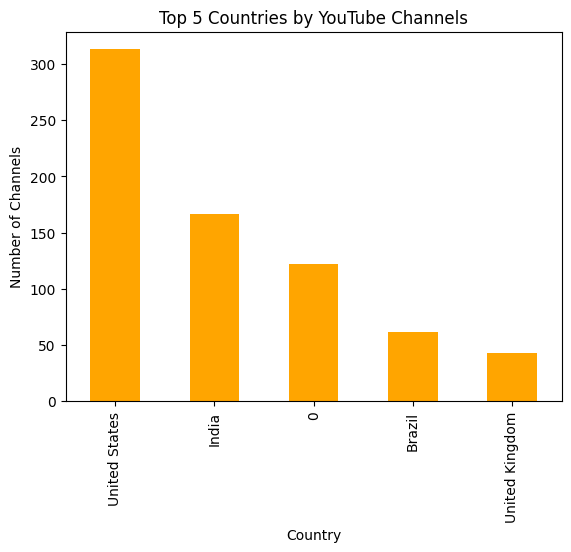

In [28]:
# 4. Top 5 countries with the highest number of YouTube channels
top_countries = df['Country'].value_counts().head(5)
print("Top 5 Countries with the Most YouTube Channels:")
print(top_countries)

# Plot
top_countries.plot(kind='bar', color='orange')
plt.title('Top 5 Countries by YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.show()

category         channel_type 
0                Entertainment    16
                 People           12
                 Games             6
                 Music             6
                 0                 4
                                  ..
Sports           Sports           10
                 Entertainment     1
Trailers         Entertainment     1
                 Music             1
Travel & Events  Entertainment     1
Name: count, Length: 99, dtype: int64


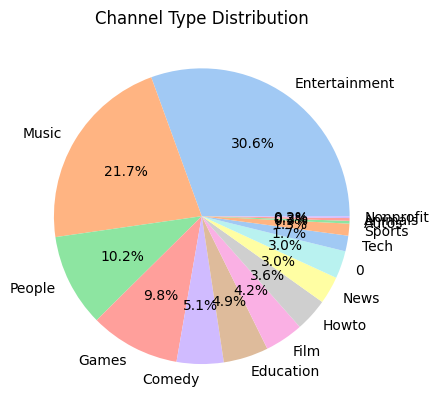

In [29]:
# 5. Distribution of channel types across categories
channel_type_distribution = df.groupby('category')['channel_type'].value_counts()
print(channel_type_distribution)

# Plot
distribution_plot = df['channel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Channel Type Distribution')
plt.ylabel('')
plt.show()

Correlation between subscribers and video views: 0.750157404858301


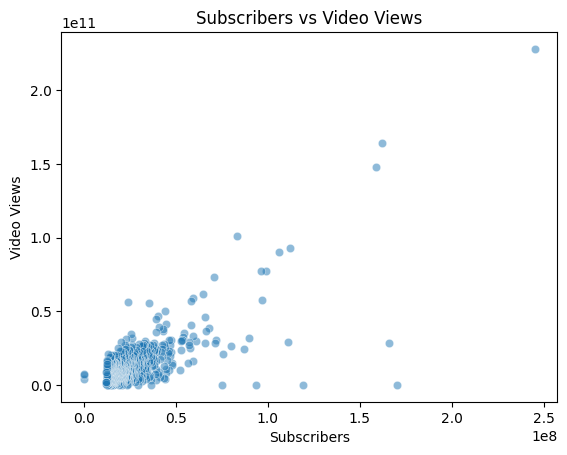

In [30]:
# 6. Correlation between subscribers and total video views
correlation = df['subscribers'].corr(df['video views'])
print(f"Correlation between subscribers and video views: {correlation}")

# Scatter plot
sns.scatterplot(data=df, x='subscribers', y='video views', alpha=0.5)
plt.title('Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

Monthly earnings by category:
                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
0                                 56316.078302              9.010938e+05
Autos & Vehicles                  68300.000000              1.086350e+06
Comedy                            41867.536232              6.683122e+05
Education                         43371.311333              6.951778e+05
Entertainment                     39393.724370              6.293549e+05
Film & Animation                  46802.533556              7.489841e+05
Gaming                            16957.979574              2.719054e+05
Howto & Style                     12053.692821              1.925452e+05
Movies                            28400.000000              4.547000e+05
Music                             34764.449801              5.550474e+05
News & Politics                   40192.625000              6.426320e+05
Nonprofits & Activism

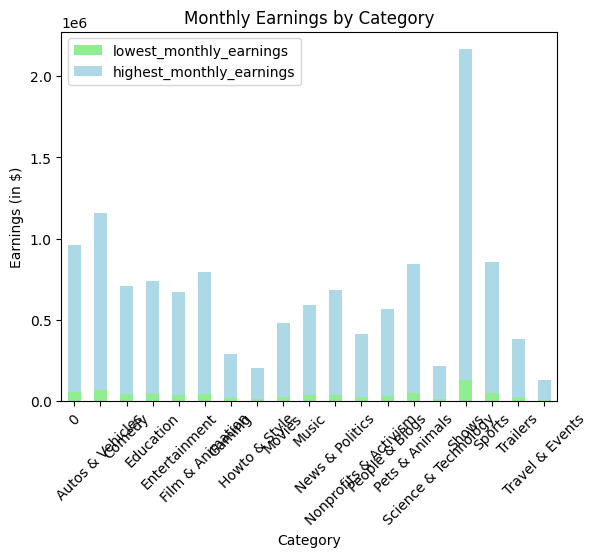

In [31]:
# 7. Monthly earnings by category
monthly_earnings = df.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
print("Monthly earnings by category:")
print(monthly_earnings)

# Plot
monthly_earnings.plot(kind='bar', stacked=True, color=['lightgreen', 'lightblue'])
plt.title('Monthly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Earnings (in $)')
plt.xticks(rotation=45)
plt.show()

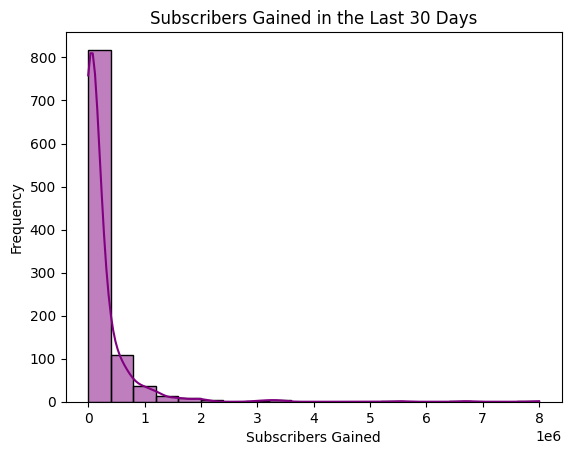

In [32]:
# 8. Trend in subscribers gained in the last 30 days
sns.histplot(df['subscribers_for_last_30_days'], bins=20, kde=True, color='purple')
plt.title('Subscribers Gained in the Last 30 Days')
plt.xlabel('Subscribers Gained')
plt.ylabel('Frequency')
plt.show()

In [33]:
# 9. Outliers in yearly earnings
z_scores = zscore(df[['lowest_yearly_earnings', 'highest_yearly_earnings']])
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]
print("Outliers in yearly earnings:")
print(outliers[['Youtuber', 'lowest_yearly_earnings', 'highest_yearly_earnings']])

Outliers in yearly earnings:
                       Youtuber  lowest_yearly_earnings  \
0                      T-Series               6800000.0   
2                       MrBeast               4000000.0   
3    Cocomelon - Nursery Rhymes               5900000.0   
4                     SET India               5500000.0   
15                     Sony SAB               5000000.0   
21                       Zee TV               5100000.0   
26                    Colors TV               3600000.0   
56                  HAR PAL GEO               4000000.0   
65               ARY Digital HD               3400000.0   
83                  GR6 EXPLODE               4900000.0   
132               BETER Bï¿½ï¿½               4400000.0   
139                    StarPlus               5000000.0   
211            Alan Chikin Chow               3100000.0   
212                   PANDA BOI               3700000.0   
302         KL BRO Biju Rithvik               6100000.0   
310              LeoNata Fa

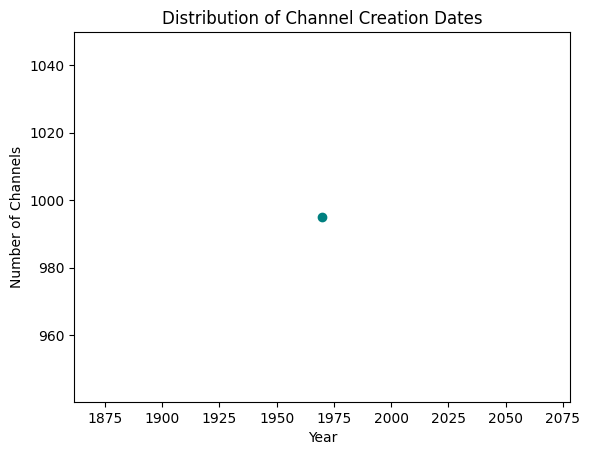

In [34]:
# 10. Distribution of channel creation dates
df['created_year'] = df['created_date'].dt.year
creation_date_distribution = df['created_year'].value_counts().sort_index()
creation_date_distribution.plot(kind='line', marker='o', color='teal')
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.show()

                      Gross tertiary education enrollment (%)  \
Country                                                         
0                                                         0.0   
Afghanistan                                               9.7   
Andorra                                                   0.0   
Argentina                                                90.0   
Australia                                               113.1   
Bangladesh                                               20.6   
Barbados                                                 65.4   
Brazil                                                   51.3   
Canada                                                   68.9   
Chile                                                    88.5   
China                                                    50.6   
Colombia                                                 55.3   
Cuba                                                     41.4   
Ecuador                  

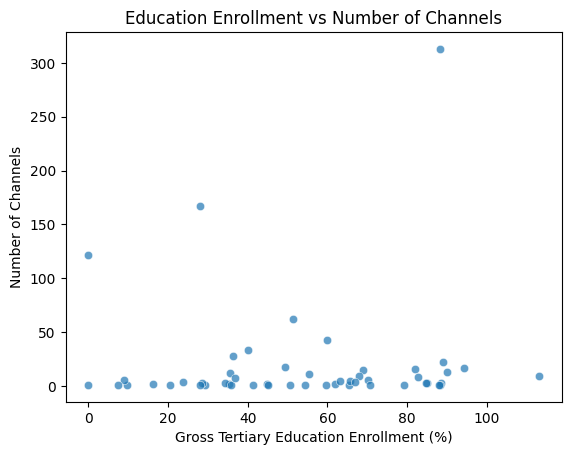

In [35]:
# 11. Relationship between gross tertiary education enrollment and number of channels per country
education_channels = df.groupby('Country').agg({'Gross tertiary education enrollment (%)': 'mean', 'Youtuber': 'count'})
education_channels.rename(columns={'Youtuber': 'Number of Channels'}, inplace=True)
print(education_channels)

# Scatter plot
sns.scatterplot(data=education_channels, x='Gross tertiary education enrollment (%)', y='Number of Channels', alpha=0.7)
plt.title('Education Enrollment vs Number of Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of Channels')
plt.show()

Country
0                  0.00
Brazil            12.08
India              5.36
United Kingdom     3.85
United States     14.70
Name: Unemployment rate, dtype: float64


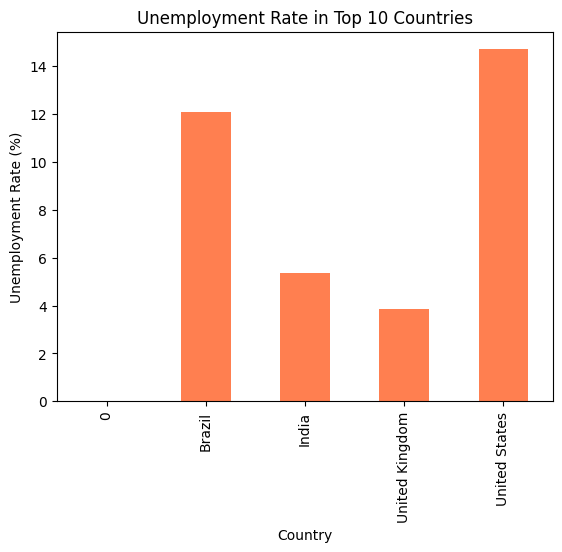

In [36]:
# 12. Unemployment rate among top 10 countries with the highest number of channels
top_countries_unemployment = df[df['Country'].isin(top_countries.index)].groupby('Country')['Unemployment rate'].mean()
print(top_countries_unemployment)

# Plot
top_countries_unemployment.plot(kind='bar', color='coral')
plt.title('Unemployment Rate in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [37]:
# 13. Average urban population percentage
urban_population_avg = df['Urban_population'].mean()
print(f"Average urban population percentage: {urban_population_avg}")

Average urban population percentage: 196497953.75175878


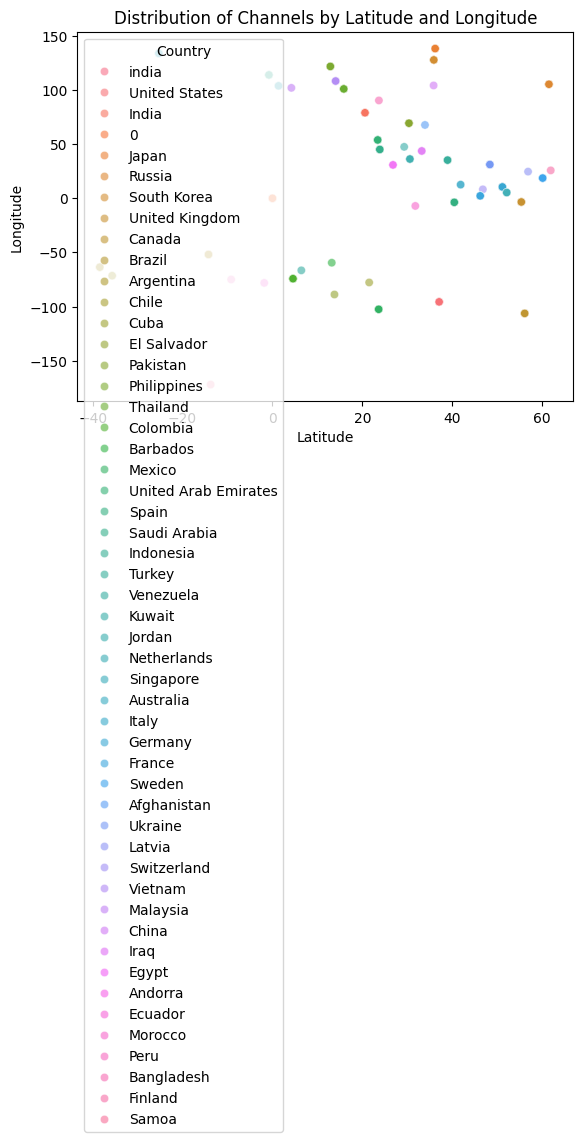

In [38]:
# 14. Patterns in distribution of channels based on latitude and longitude
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Country', alpha=0.6)
plt.title('Distribution of Channels by Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [39]:
# 15. Correlation between subscribers and population
subscribers_population_corr = df['subscribers'].corr(df['Population'])
print(f"Correlation between subscribers and population: {subscribers_population_corr}")

Correlation between subscribers and population: 0.0681435298296246


Country
United States     3.282395e+08
India             1.366418e+09
0                 0.000000e+00
Brazil            2.125594e+08
United Kingdom    6.683440e+07
Name: Population, dtype: float64


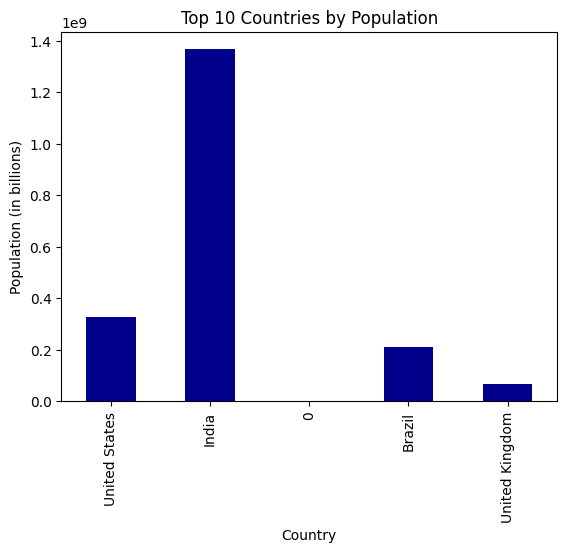

In [40]:
# 16. Top 10 countries by number of channels and their total population
country_population = df.groupby('Country')['Population'].mean().loc[top_countries.index]
print(country_population)

# Plot
country_population.plot(kind='bar', color='darkblue')
plt.title('Top 10 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population (in billions)')
plt.show()

In [41]:
# 17. Correlation between subscribers gained in last 30 days and unemployment rate
subscribers_unemployment_corr = df['subscribers_for_last_30_days'].corr(df['Unemployment rate'])
print(f"Correlation between subscribers gained in the last 30 days and unemployment rate: {subscribers_unemployment_corr}")

Correlation between subscribers gained in the last 30 days and unemployment rate: -0.01022877221069297


<ipython-input-42-0c458856aca2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel_type', y='video_views_for_the_last_30_days', palette='Set3')


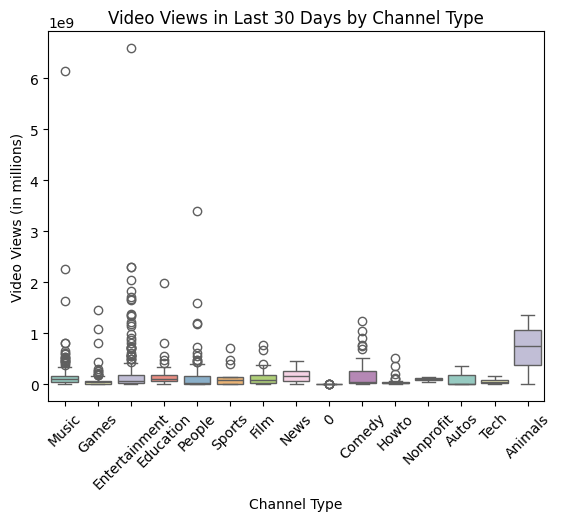

In [42]:
# 18. Distribution of video views for the last 30 days by channel type
sns.boxplot(data=df, x='channel_type', y='video_views_for_the_last_30_days', palette='Set3')
plt.title('Video Views in Last 30 Days by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views (in millions)')
plt.xticks(rotation=45)
plt.show()

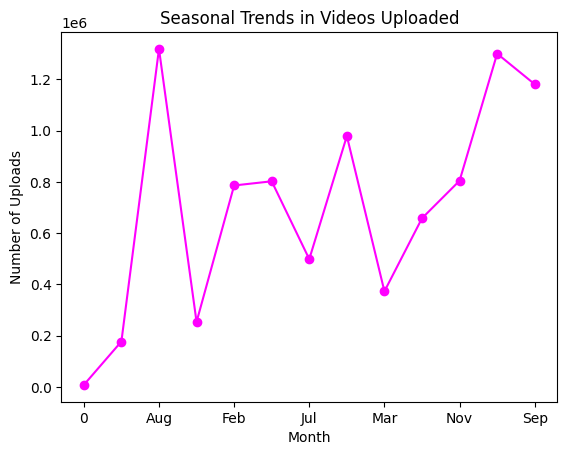

In [43]:
# 19. Seasonal trends in number of videos uploaded
if 'created_month' not in df.columns:
    df['created_month'] = df['created_date'].dt.month
monthly_uploads = df.groupby('created_month')['uploads'].sum()
monthly_uploads.plot(kind='line', marker='o', color='magenta')
plt.title('Seasonal Trends in Videos Uploaded')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.show()

In [44]:
# 20. Average subscribers gained per month since creation
df['months_since_creation'] = ((pd.Timestamp('now') - df['created_date']).dt.days / 30).round()
df['avg_subscribers_per_month'] = df['subscribers'] / df['months_since_creation']
print("Average subscribers gained per month since creation:")
print(df[['Youtuber', 'avg_subscribers_per_month']].head())

Average subscribers gained per month since creation:
                     Youtuber  avg_subscribers_per_month
0                    T-Series              365126.676602
1              YouTube Movies              253353.204173
2                     MrBeast              247391.952310
3  Cocomelon - Nursery Rhymes              241430.700447
4                   SET India              236959.761550
